In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.utils.readoutnc

In [3]:
import kid_readout.analysis.resonator

In [4]:
import kid_readout.analysis.archive

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:923: UserWarning:  This call to matplotlib.use() has no effect
because the the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  if warn: warnings.warn(_use_error_msg)


In [5]:
df = kid_readout.analysis.archive.build_simple_archives('/data/detectors/pkl/2015-06-*.pkl')

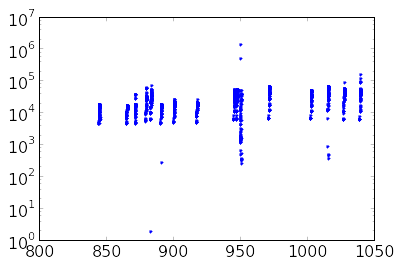

In [6]:
semilogy(df.f_0,df.Q_i,'.')

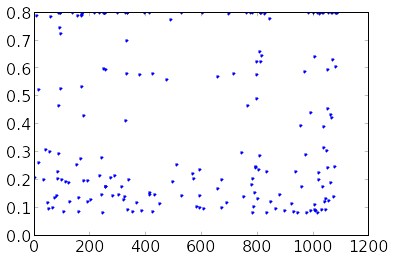

In [7]:
plot(df.a,'.')

In [8]:
dd = df[(df.a>0)&(df.resonator_id==14)&(df.atten < 30)]

In [9]:
dd.shape

(17, 89)

In [10]:
dd.resonator_id.value_counts()

14    17
dtype: int64

In [11]:
dd = df[(df.a>0)&(df.resonator_id==14)]
dd.atten.value_counts()

0     5
8     2
6     2
4     2
2     2
30    1
10    1
7     1
5     1
3     1
dtype: int64

In [12]:
dd.shape

(18, 89)

0 0.0161453708078 2911.33713152
0 0.00791293876268 1513.32620716 0.252846200049 0.252846200049
1 0.046930073086 9354.43884592
1 0.037168072661 7472.47386947 0.786365727421 0.786365727421
2 0.0272079600689 2376.58585105
2 0.0235131341964 2117.73317124 0.0860624521466 0.0860624521466
3 0.0149353725617 3006.61017128
3 0.0102119138695 2057.28668682 0.215778609041 0.215778609041
4 0.047508234324 10242.5276564
4 0.0414368001996 8960.46362047 0.799952260652 0.799952260652
5 0.0569543874815 8831.43932693
5 0.0511533778349 7911.6417493 0.147158798282 0.147158798282
6 0.0113561935985 2139.93271912
6 0.00634811957241 1189.33708881 0.175019581123 0.175019581123
7 0.0406274592915 6638.67113892
7 0.033801078027 5495.15435966 0.0872459387054 0.0872459387054
8 0.043239261345 8847.42441215
8 0.0415539053634 8482.33524717 0.799984691168 0.799984691168
9 0.0101831829553 1953.90951296
9 0.00257867330726 501.131947309 0.558960024677 0.558960024677
10 0.0105948406283 1826.57137228
10 0.00898667993881 1607.5

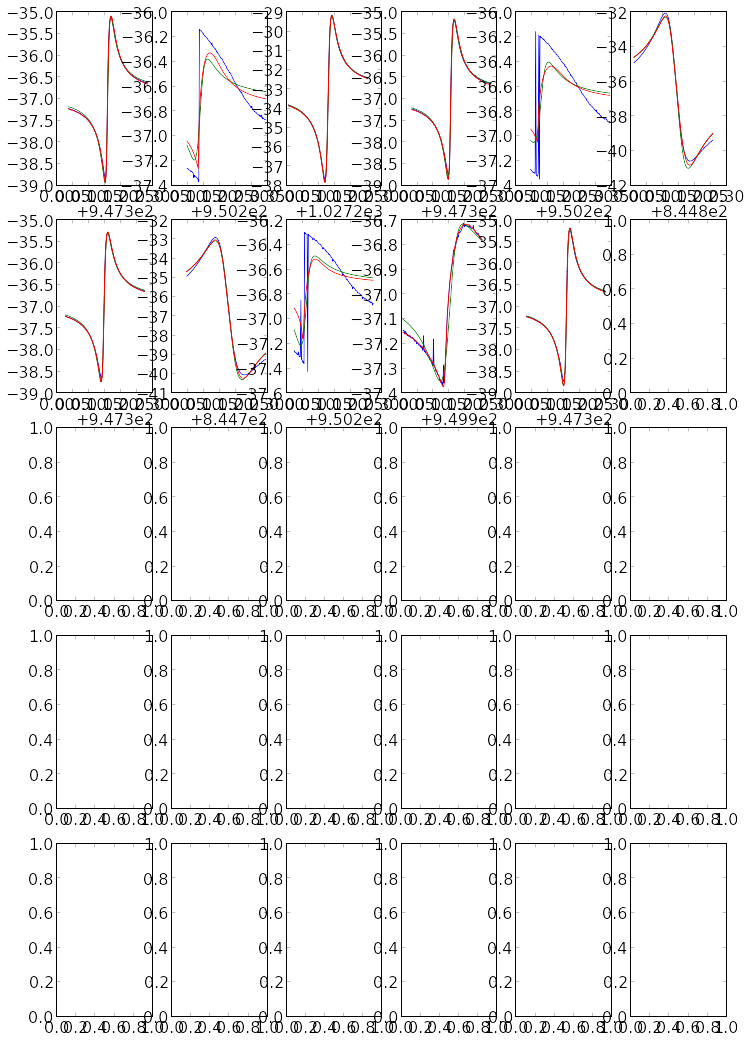

In [13]:
dd = df[(df.a>0)&(df.atten ==10)]
fig,axs = subplots(5,6,figsize=(12,18))
for n,(k,row) in enumerate(dd.iterrows()):
    ax = axs.flatten()[n]
    ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21)))
    res = kid_readout.analysis.resonator.fit_best_resonator(row.sweep_freqs_MHz,row.sweep_s21,errors=row.sweep_errors,min_a=1.0,
                                                           delay_estimate=row.delay_estimate_microseconds)
    ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(res.model(x=row.sweep_freqs_MHz))))
    print n,np.abs(row.sweep_s21-res.model(x=row.sweep_freqs_MHz)).sum(),np.abs(res.residual()).sum()
    res = kid_readout.analysis.resonator.fit_best_resonator(row.sweep_freqs_MHz,row.sweep_s21,errors=row.sweep_errors,
                                                           delay_estimate=row.delay_estimate_microseconds,verbose=True)
    ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(res.model(x=row.sweep_freqs_MHz))))
    print n,np.abs(row.sweep_s21-res.model(x=row.sweep_freqs_MHz)).sum(),np.abs(res.residual()).sum(),getattr(res,'a',None),row.a
#    ax.plot(row.sweep_model_freqs_MHz,20*np.log10(np.abs(row.sweep_model_normalized_s21)))
    

In [14]:
row.delay

-31.298752282892295